In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housingUnits.csv')
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880,223,322,126,208.1300,1,452600
1,21,7099,1338,2401,1138,207.5350,1,358500
2,52,1467,328,496,177,181.4350,1,352100
3,52,1274,293,558,219,141.0775,1,341300
4,52,1627,357,565,259,96.1550,1,342200


In [3]:
df.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.735271,1425.476744,499.539680,96.766775,2.965988,206855.816909
std,12.585558,2181.615252,391.392913,1132.462122,382.329753,47.495543,0.943948,115395.615874
min,1.000000,2.000000,65.000000,3.000000,1.000000,12.497500,0.000000,14999.000000
25%,18.000000,1447.750000,324.750000,787.000000,280.000000,64.085000,3.000000,119600.000000
50%,29.000000,2127.000000,446.000000,1166.000000,409.000000,88.370000,3.000000,179700.000000
75%,37.000000,3148.000000,630.000000,1725.000000,605.000000,118.581250,4.000000,264725.000000
max,52.000000,39320.000000,7119.000000,35682.000000,6082.000000,375.002500,4.000000,500001.000000


### Question 1

In [4]:
from sklearn.linear_model import LinearRegression
var2 = df['total_rooms']
var3 = df['total_bedrooms']
y = df['median_house_value']
print("the range of var2 are from",var2.min(),"to",var2.max())
print("the range of var3 are from",var3.min(),"to",var3.max())

var_population= df[['population']]
var_households = df[['households']]

model = LinearRegression()
model.fit(var_population,y)
model2 = LinearRegression()
model2.fit(var_households,y)

r2_population = model.score(var_population, y)
r2_households = model2.score(var_households, y)
print("R^2 for the model using population:", r2_population)
print("R^2 for the model using households:", r2_households)

the range of var2 are from 2 to 39320
the range of var3 are from 65 to 7119
R^2 for the model using population: 0.0006076066693256887
R^2 for the model using households: 0.0043352546340906795


### Question 2

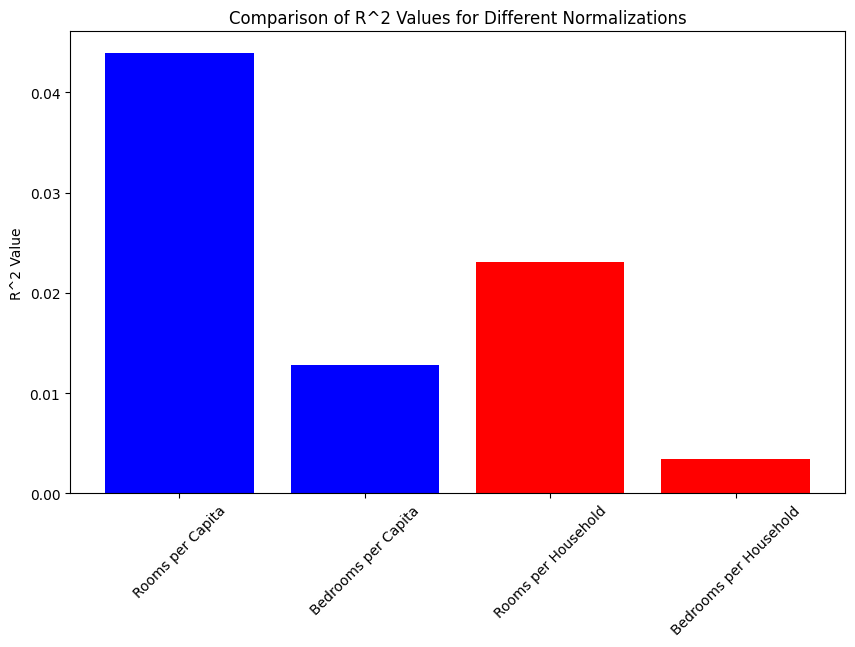

r2_rooms_per_capita: 0.043882695338919864
r2_bedrooms_per_capita: 0.012790501296178869
r2_rooms_per_household: 0.023088282755354128
r2_bedrooms_per_household: 0.003394278159693398


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Normalize total_rooms and total_bedrooms by population and by households
rooms_per_capita = df['total_rooms'] / df['population']
bedrooms_per_capita = df['total_bedrooms'] / df['population']
rooms_per_household = df['total_rooms'] / df['households']
bedrooms_per_household = df['total_bedrooms'] / df['households']

# Prepare the data for linear regression models
X_rooms_per_capita = rooms_per_capita.values.reshape(-1, 1)
X_bedrooms_per_capita = bedrooms_per_capita.values.reshape(-1, 1)
X_rooms_per_household = rooms_per_household.values.reshape(-1, 1)
X_bedrooms_per_household = bedrooms_per_household.values.reshape(-1, 1)

# Initialize models
model_rooms_per_capita = LinearRegression()
model_bedrooms_per_capita = LinearRegression()
model_rooms_per_household = LinearRegression()
model_bedrooms_per_household = LinearRegression()

# Fit models
model_rooms_per_capita.fit(X_rooms_per_capita, y)
model_bedrooms_per_capita.fit(X_bedrooms_per_capita, y)
model_rooms_per_household.fit(X_rooms_per_household, y)
model_bedrooms_per_household.fit(X_bedrooms_per_household, y)

# Calculate R^2 values
r2_rooms_per_capita = model_rooms_per_capita.score(X_rooms_per_capita, y)
r2_bedrooms_per_capita = model_bedrooms_per_capita.score(X_bedrooms_per_capita, y)
r2_rooms_per_household = model_rooms_per_household.score(X_rooms_per_household, y)
r2_bedrooms_per_household = model_bedrooms_per_household.score(X_bedrooms_per_household, y)

# Prepare for visualization
r2_values = [r2_rooms_per_capita, r2_bedrooms_per_capita, r2_rooms_per_household, r2_bedrooms_per_household]
labels = ['Rooms per Capita', 'Bedrooms per Capita', 'Rooms per Household', 'Bedrooms per Household']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(labels, r2_values, color=['blue', 'blue', 'red', 'red'])
plt.ylabel('R^2 Value')
plt.title('Comparison of R^2 Values for Different Normalizations')
plt.xticks(rotation=45)
plt.show()

print("r2_rooms_per_capita:", r2_rooms_per_capita)
print("r2_bedrooms_per_capita:", r2_bedrooms_per_capita)
print("r2_rooms_per_household:", r2_rooms_per_household)
print("r2_bedrooms_per_household:", r2_bedrooms_per_household)

### Question 3


median_income 0.47344749180719903 population 0.0006076066693256887


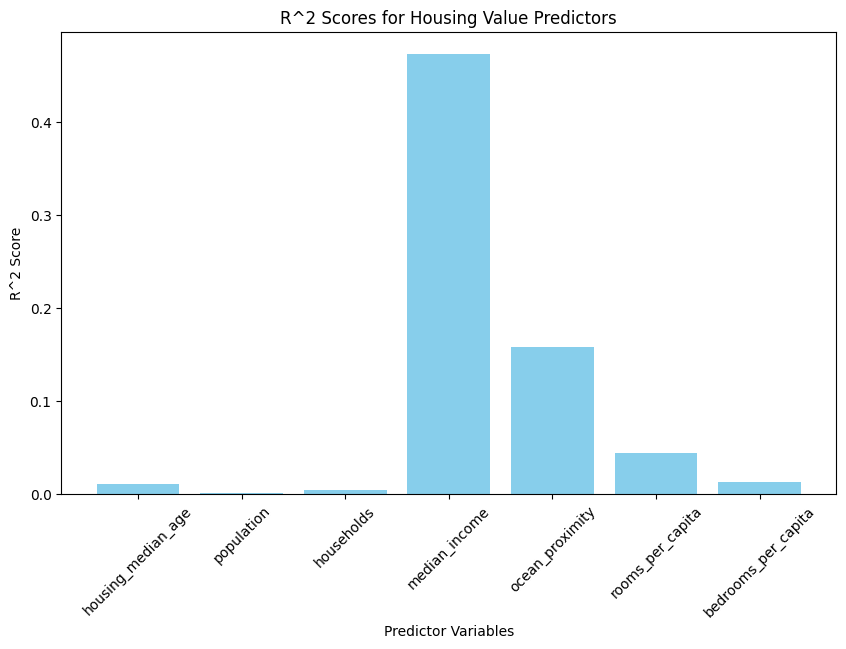

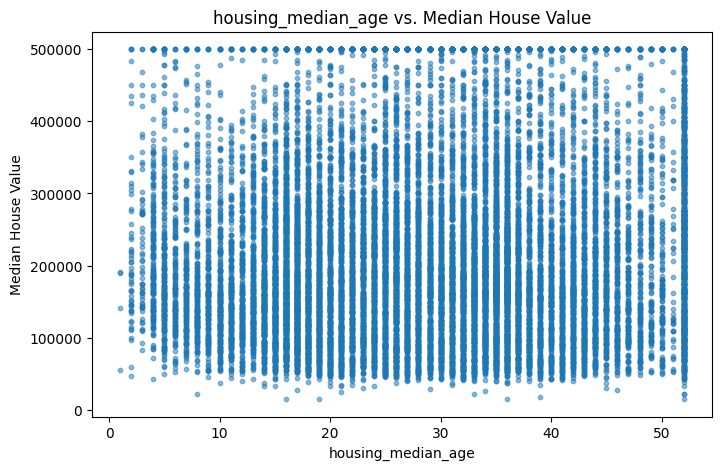

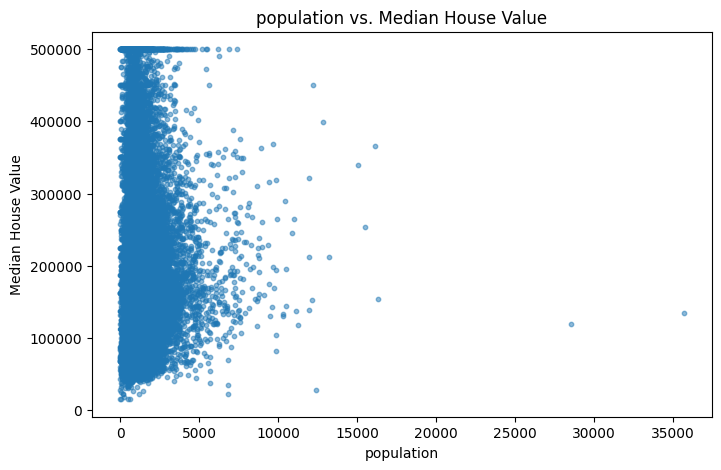

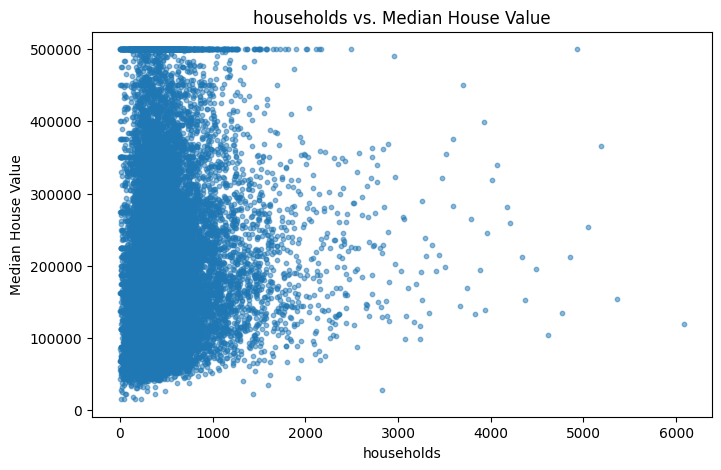

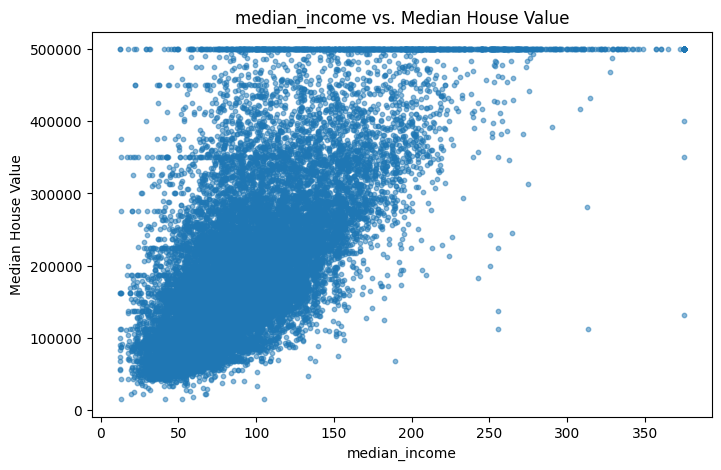

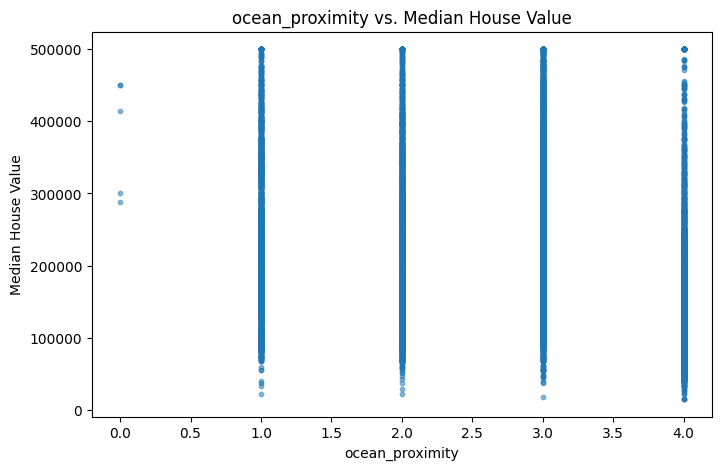

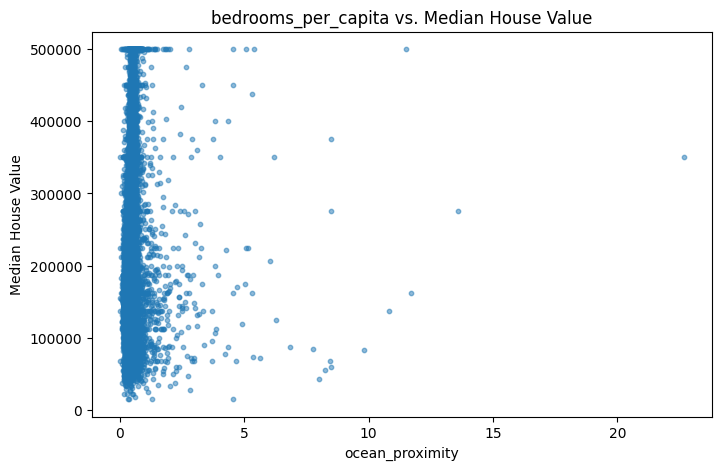

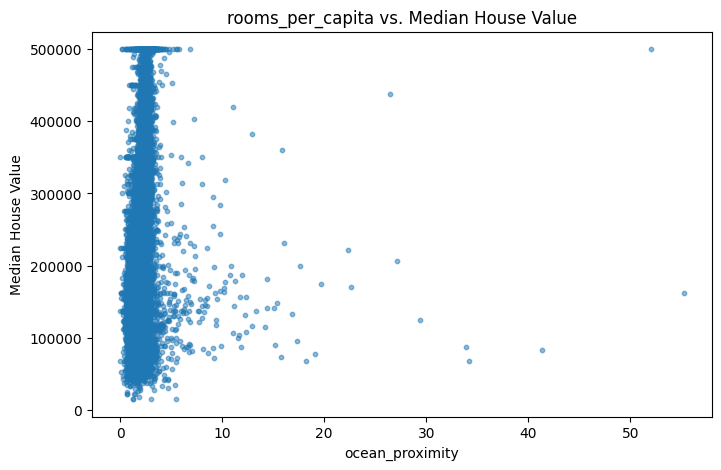

In [18]:
# List of predictor variables in the dataset
predictors = ['housing_median_age', 'population', 'households','median_income','ocean_proximity']
r2_scores = {}

# Fit a model for each predictor and calculate the R^2 score
for predictor in predictors:
    X = df[[predictor]]
    y = df['median_house_value']
    
    model.fit(X, y)
    r2_scores[predictor] = model.score(X, y)
    
r2_scores['rooms_per_capita'] = r2_rooms_per_capita
r2_scores['bedrooms_per_capita'] = r2_bedrooms_per_capita
# Find the variable with the highest and lowest R^2 score
most_predictive = max(r2_scores, key=r2_scores.get)
least_predictive = min(r2_scores, key=r2_scores.get)

most_predictive_r2 = r2_scores[most_predictive]
least_predictive_r2 = r2_scores[least_predictive]

print(most_predictive, most_predictive_r2, least_predictive, least_predictive_r2)

plt.figure(figsize=(10, 6))
plt.bar(r2_scores.keys(), r2_scores.values(), color='skyblue')
plt.xlabel('Predictor Variables')
plt.ylabel('R^2 Score')
plt.title('R^2 Scores for Housing Value Predictors')
plt.xticks(rotation=45)
plt.show()

# Create scatter plots for each predictor with smaller points
for predictor in predictors:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[predictor], y, alpha=0.5, s=10)  # Reduced point size with 's=10'
    plt.title(f'{predictor} vs. Median House Value')
    plt.xlabel(predictor)
    plt.ylabel('Median House Value')
    plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(bedrooms_per_capita, y, alpha=0.5, s=10)  # Reduced point size with 's=10'
plt.title('bedrooms_per_capita vs. Median House Value')
plt.xlabel(predictor)
plt.ylabel('Median House Value')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(rooms_per_capita, y, alpha=0.5, s=10)  # Reduced point size with 's=10'
plt.title('rooms_per_capita vs. Median House Value')
plt.xlabel(predictor)
plt.ylabel('Median House Value')
plt.show()

### Question 4


In [19]:
# Add the normalized features to the DataFrame
df['rooms_per_capita'] = df['total_rooms'] / df['population']
df['bedrooms_per_capita'] = df['total_bedrooms'] / df['population']

# Define all seven predictors including the normalized ones
predictors = ['housing_median_age', 'population', 'households', 'median_income', 'ocean_proximity', 'rooms_per_capita', 'bedrooms_per_capita']

# Define the features (X) and the target (y)
X = df[predictors]
y = df['median_house_value']

# Initialize and fit the Linear Regression model
multiple_model = LinearRegression()
multiple_model.fit(X, y)

# Calculate the R^2 score for the multiple regression model
multiple_r2_score = multiple_model.score(X, y)

# Display the R^2 score
print(f"R^2 score for the multiple regression model: {multiple_r2_score}")


R^2 score for the multiple regression model: 0.6006645246293567


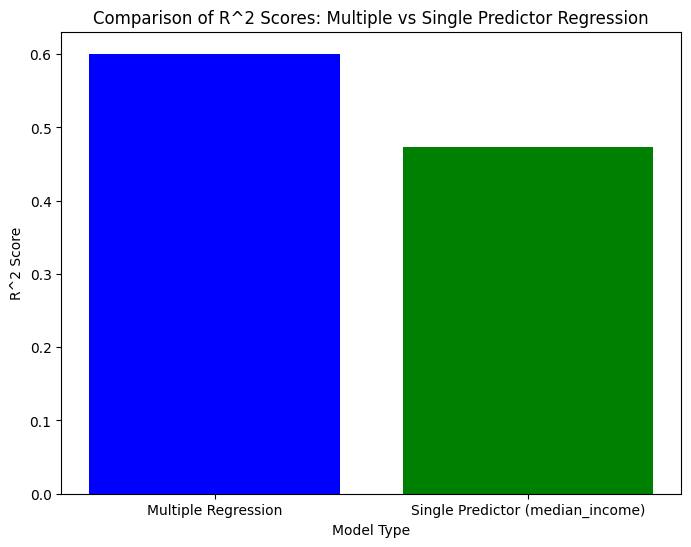

In [20]:
import matplotlib.pyplot as plt

# R^2 scores for comparison
r2_scores_comparison = {
    'Multiple Regression': 0.6006645246293567,
    'Single Predictor (median_income)': 0.473
}

# Drawing the comparison bar graph
plt.figure(figsize=(8, 6))
plt.bar(r2_scores_comparison.keys(), r2_scores_comparison.values(), color=['blue', 'green'])
plt.xlabel('Model Type')
plt.ylabel('R^2 Score')
plt.title('Comparison of R^2 Scores: Multiple vs Single Predictor Regression')
plt.show()


### Question 5

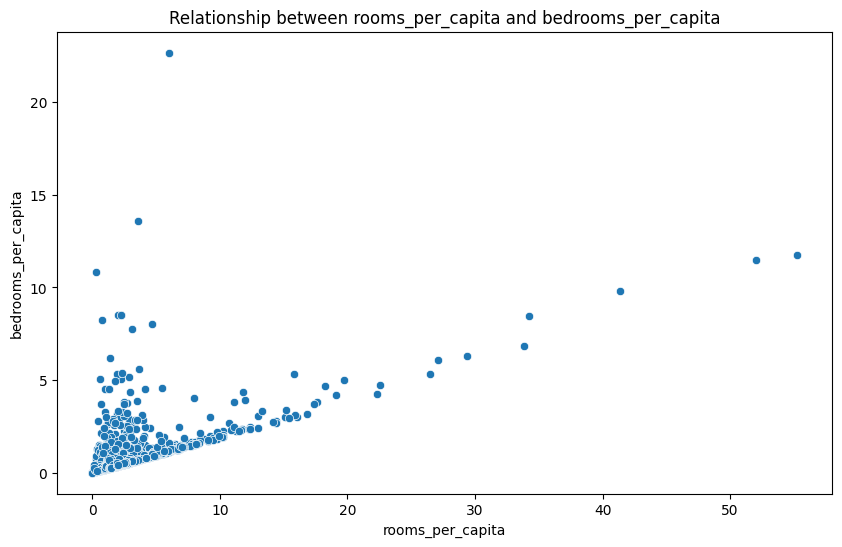

the correlation between rooms_per_capita and bedrooms_per_capita 0.6414637002481975


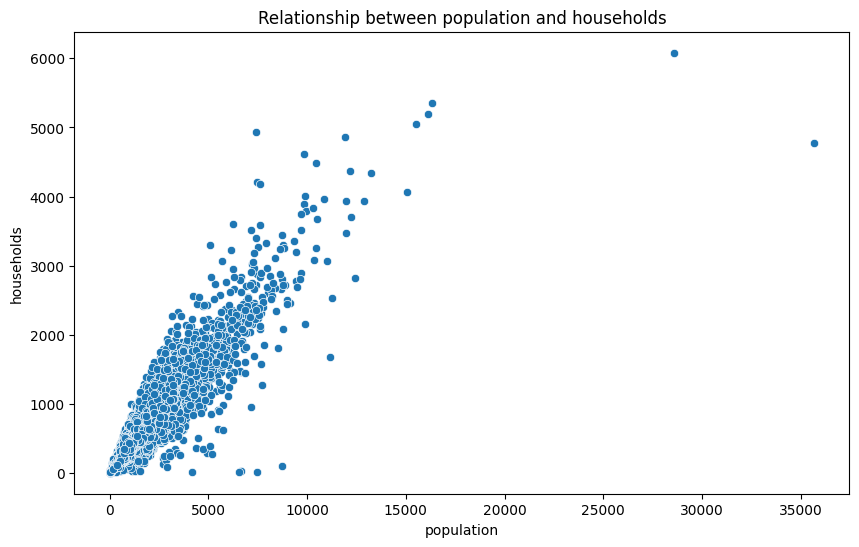

the correlation between population and households 0.9072222660959658


In [24]:
import seaborn as sns

scatterplot_data = df[["rooms_per_capita","bedrooms_per_capita"]]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatterplot_data, x='rooms_per_capita', y='bedrooms_per_capita')
plt.title('Relationship between rooms_per_capita and bedrooms_per_capita')
plt.xlabel('rooms_per_capita')
plt.ylabel('bedrooms_per_capita')
plt.show()

# Calculating Pearson's correlation coefficient
correlation = scatterplot_data.corr(method='pearson')
correlation_value = correlation.iloc[0, 1]
print("the correlation between rooms_per_capita and bedrooms_per_capita", correlation_value)

scatterplot_data = df[["population","households"]]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatterplot_data, x='population', y='households')
plt.title('Relationship between population and households')
plt.xlabel('population')
plt.ylabel('households')
plt.show()

# Calculating Pearson's correlation coefficient
correlation = scatterplot_data.corr(method='pearson')
correlation_value = correlation.iloc[0, 1]
print("the correlation between population and households", correlation_value)


### Extra Credit a

/Users/alex_z/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alex_z/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alex_z/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alex_z/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

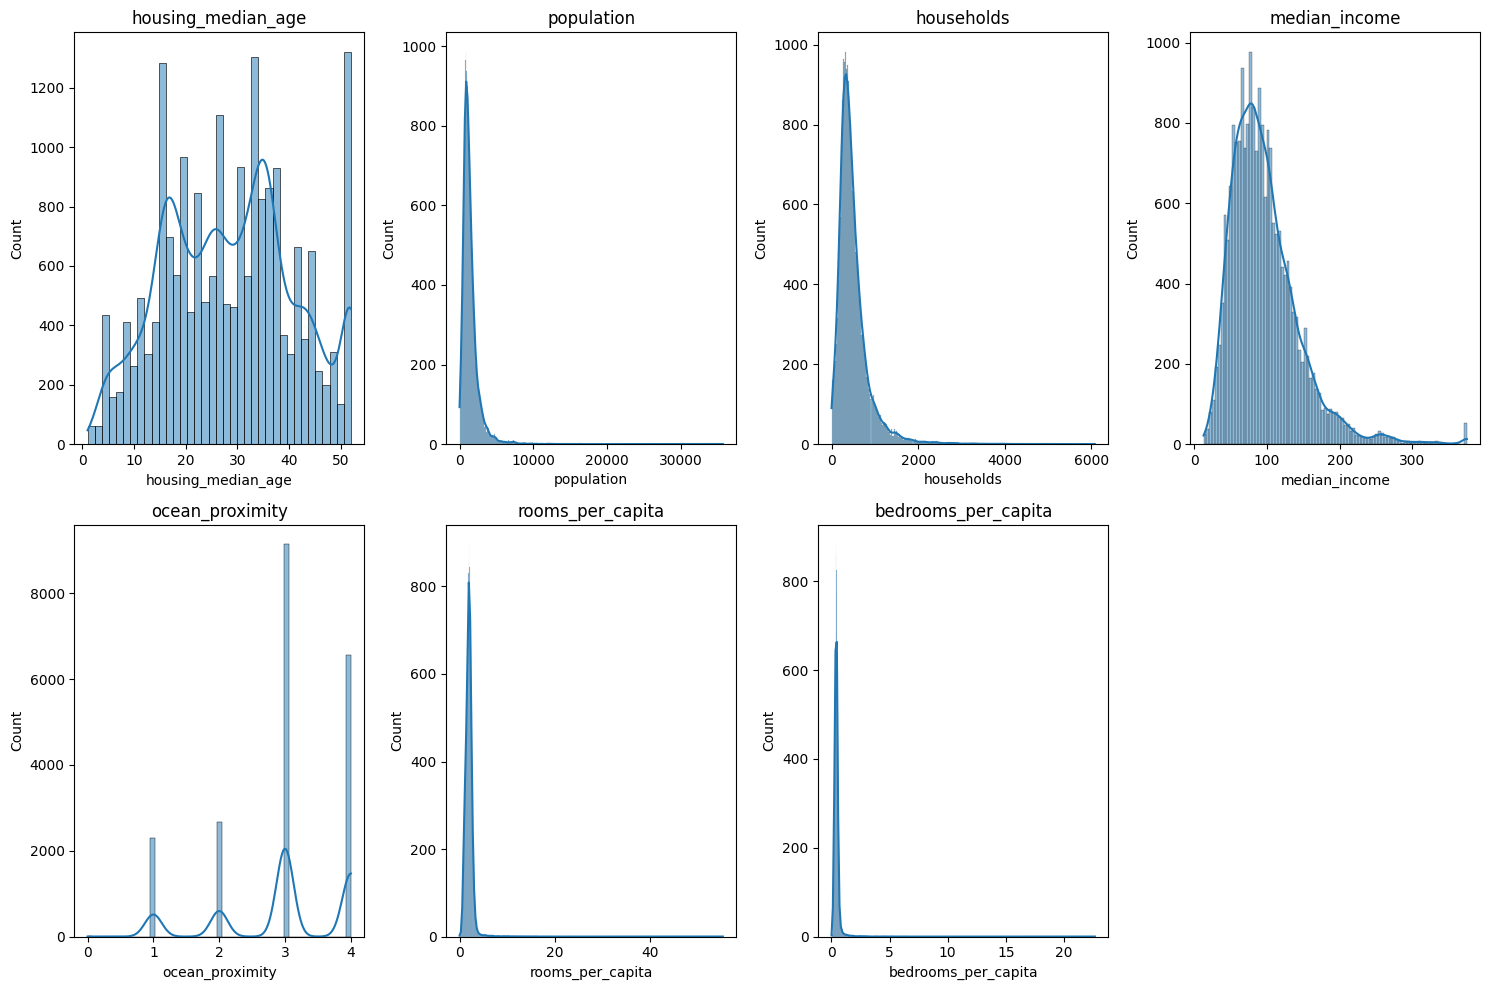

In [27]:

plt.figure(figsize=(15, 10))
for i, predictor in enumerate(predictors):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[predictor], kde=True)
    plt.title(predictor)
plt.tight_layout()
plt.show()

In [29]:
from scipy.stats import kstest

for predictor in predictors:
    stat, p = kstest(df[predictor], 'norm', args=(df[predictor].mean(), df[predictor].std()))
    print(f'{predictor}: Statistics={stat}, p={p}') ## might delete this line, if space is not enough
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian') ## none of those features are normally distributed

housing_median_age: Statistics=0.06050135200320789, p=4.05515282919101e-66
Probably not Gaussian
population: Statistics=0.14713026769169946, p=0.0
Probably not Gaussian
households: Statistics=0.14618368329350362, p=0.0
Probably not Gaussian
median_income: Statistics=0.08942727065082501, p=4.455166455089383e-144
Probably not Gaussian
ocean_proximity: Statistics=0.27440035209190416, p=0.0
Probably not Gaussian
rooms_per_capita: Statistics=0.1782075189081661, p=0.0
Probably not Gaussian
bedrooms_per_capita: Statistics=0.26594766368407863, p=0.0
Probably not Gaussian


### extra credit B 

/Users/alex_z/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


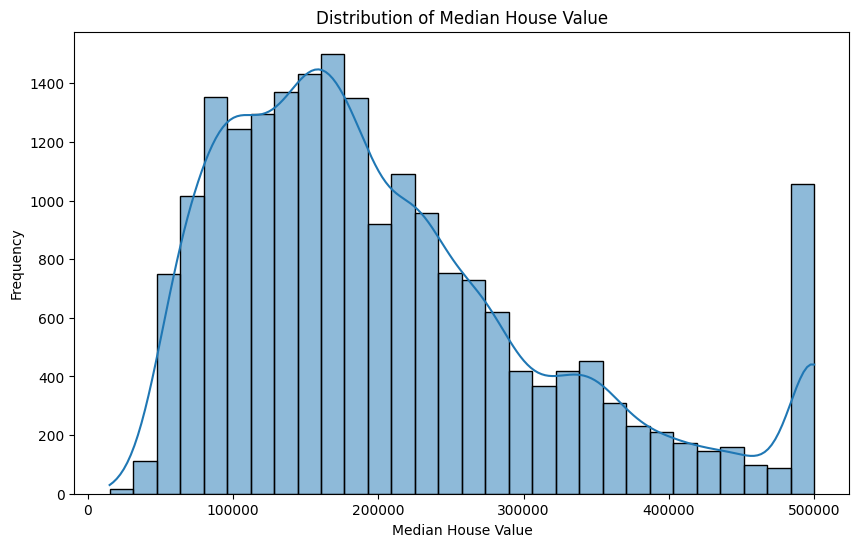

median_house_value: Statistics=0.10298580690210829, p=4.788132375542901e-191
Probably not Gaussian


In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], kde=True, bins=30)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

stat, p = kstest(df['median_house_value'], 'norm', args=(df['median_house_value'].mean(), df['median_house_value'].std()))
print(f'median_house_value: Statistics={stat}, p={p}') ## might delete this line, if space is not enough
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian') ## none of those features are normally distributed

In [35]:
import pandas as pd

# Using pandas
skewness_pd = df['median_house_value'].skew()
print(f"Skewness with pandas: {skewness_pd}")


Skewness with pandas: 0.9777632739098341
